In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
data = np.array([[0.,0.],[1.,0.],[0.,1.],[1.,1.]])
labels = np.array([1.,0.,0.,1.])

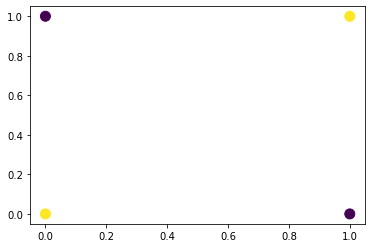

In [15]:
plt.scatter(data[:,0],data[:,1],s=100,c=labels);

In [4]:
W2 = np.array([[1,-1],[-1,1]])
W1 = np.array([[-1],[-1]])
b2 = np.array([0,0])
b1 = np.array([0.5])              

In [5]:
W2

array([[ 1, -1],
       [-1,  1]])

In [9]:
class CLF():
    
    def __init__(self,W2,W1,b2,b1):
        self.W2 = W2
        self.W1 = W1
        self.b2 = b2
        self.b1 = b1
    
    def layer2(self,x):
        return x@self.W2 + self.b2
    
    def layer1(self,x):
        return x@self.W1 + self.b1
    
    def relu(self,x):
        return np.maximum(x,np.zeros(2))
    
    def sigmoid(self,x):
        return 1.0/(1.0 + np.exp(-x))
    
    def predict(self,X):
        z = self.layer2(X)
        z = self.relu(z)
        z = self.layer1(z)
        z = self.sigmoid(z)
    
        return z
    

In [10]:
clf = CLF(W2,W1,b2,b1)

In [11]:
clf.predict(np.array([0,1]))

array([0.37754067])

In [79]:
def plot_decision_boundary(data,labels,clf):
    plot_step = 0.02
    x_min, x_max = data[:,0].min() -1, data[:,0].max() + 1
    y_min,y_max = data[:,1].min() -1 , data[:,1].max() + 1

    xx,yy = np.meshgrid(np.arange(x_min,x_max,plot_step),
                   np.arange(y_min,y_max,plot_step))
    Z = np.array([clf.predict([z]) for z in np.c_[xx.ravel(),yy.ravel()]])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx,yy,Z,cmap='cool')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Decision Boundary')

    plt.scatter(data[:,0],data[:,1],c=labels,cmap='hot',s=100)
    plt.show()

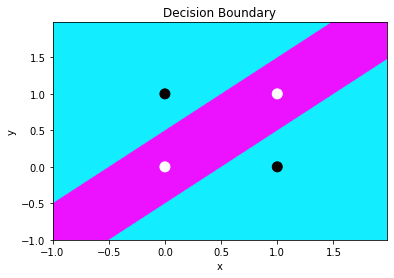

In [80]:
plot_decision_boundary(data,labels,clf)